<a href="https://colab.research.google.com/github/DanaGuber/MachineLearning/blob/main/Ejercicioknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing, neighbors
from sklearn. model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [44]:
Mean_X1 = 50
Mean_Y1 = 40

Mean_X2 = 34
Mean_Y2 = 40

Desvio_X1 = 10
Desvio_Y1 = 10

Desvio_X2 = 8
Desvio_Y2 = 11

In [45]:
X1 = np.random.normal(loc=Mean_X1,scale=Desvio_X1, size= 100)
Y1 = np.random.normal(loc=Mean_Y1,scale=Desvio_Y1, size= 100)

X2 = np.random.normal(loc=Mean_X2,scale=Desvio_X2, size= 100)
Y2 = np.random.normal(loc=Mean_Y2,scale=Desvio_Y2, size= 100)

In [46]:
df1 = pd.DataFrame({'color':'b','Tag':'A','x':X1,'y':Y1})

df2 = pd.DataFrame({'color':'r','Tag':'B','x':X2,'y':Y2})
df1

,color,Tag,x,y
0,b,A,60.329155,27.285408
1,b,A,49.949602,48.300175
2,b,A,54.022235,48.666669
3,b,A,51.083152,34.361091
4,b,A,29.888238,66.363131
...,...,...,...,...
95,b,A,45.025030,46.652755
96,b,A,74.160643,44.029756
97,b,A,53.085360,63.428675
98,b,A,39.798755,39.904891


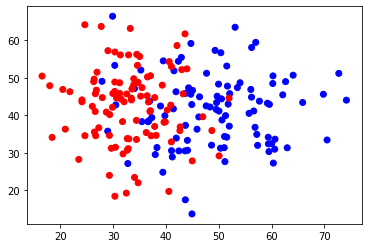

In [47]:
df = pd.concat([df1,df2])

plt.scatter(df['x'],df['y'],c = df['color'])

In [48]:
df

,color,Tag,x,y
0,b,A,60.329155,27.285408
1,b,A,49.949602,48.300175
2,b,A,54.022235,48.666669
3,b,A,51.083152,34.361091
4,b,A,29.888238,66.363131
...,...,...,...,...
95,r,B,42.988067,52.154297
96,r,B,32.673987,30.723841
97,r,B,27.947793,44.703668
98,r,B,34.715987,48.765463


In [49]:
Y=df[['Tag']]
X=df[['x','y']]

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

NameError: ignored

In [96]:
df = pd.DataFrame(columns = ['k' , 'Score','accuracy','precision','f-measure'])
for k in range(1, 20):
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, Y_train)
  clf.score(X,Y)
  clf.predict(X)
  
  df.loc[k-1]=[k,clf.score(X,Y), accuracy_score(Y, clf.predict(X)), precision_score(Y, clf.predict(X),average='weighted'),f1_score(Y, clf.predict(X),average='weighted')]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [97]:
df 

,k,Score,accuracy,precision,f-measure
0,1.0,0.955,0.955,0.955410,0.954990
1,2.0,0.845,0.845,0.868000,0.842540
2,3.0,0.860,0.860,0.860577,0.859944
3,4.0,0.840,0.840,0.843434,0.839599
4,5.0,0.830,0.830,0.830132,0.829983
5,6.0,0.810,0.810,0.811120,0.809829
6,7.0,0.830,0.830,0.830529,0.829932
7,8.0,0.820,0.820,0.821156,0.819838
8,9.0,0.820,0.820,0.822061,0.819712
9,10.0,0.840,0.840,0.840000,0.840000


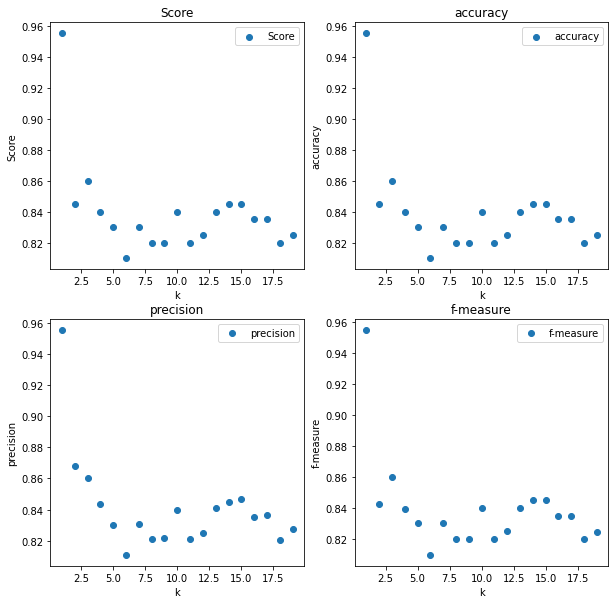

In [98]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df['k'], df['Score'],label='Score')
plt.xlabel("k")
plt.ylabel("Score")
plt.title('Score')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(df['k'], df['accuracy'], label='accuracy')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title('accuracy')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(df['k'], df['precision'], label='precision')
plt.xlabel("k")
plt.ylabel("precision")
plt.title('precision')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(df['k'], df['f-measure'], label='f-measure')
plt.xlabel("k")
plt.ylabel("f-measure")
plt.title('f-measure')
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


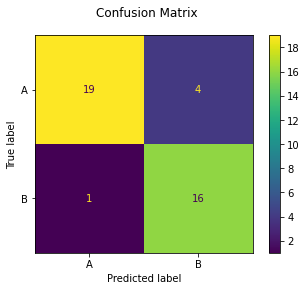

In [99]:
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix");
